In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

df = pd.read_csv("weight-height.csv")
df.sample(5)

,Gender,Height,Weight
4878,Male,68.416767,188.117700
5191,Female,58.861625,90.728561
5649,Female,65.238138,135.648212
1388,Male,67.294018,174.087728
7900,Female,66.151355,160.767288


In [4]:
df.shape

(10000, 3)

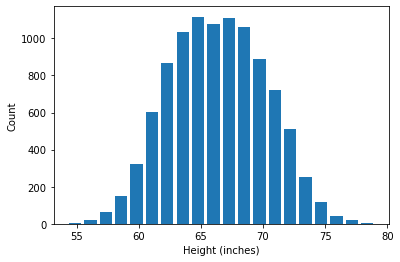

In [4]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df.Height.mean()

66.36755975482106

In [7]:
df.Height.std()

3.847528120773233

In [9]:

#(1) Outlier detection and removal using 3 standard deviation
#One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean.
#Which means we can come up with following upper and lower bounds
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [10]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250136

In [11]:

df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [12]:
#Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height.
#There are people who have this height but it is very uncommon and it is ok if you remove those data points. 
#Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height
#you don't find many people having this height so it is safe to consider both of these cases as outliers
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
df_no_outlier_std_dev.shape

(9993, 3)

Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

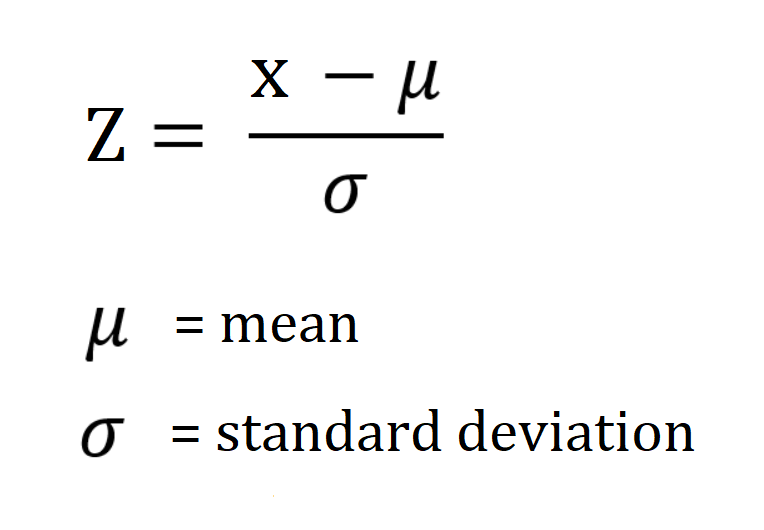

In [15]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [16]:

(73.84-66.37)/3.84 
#Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

1.9453124999999998

In [17]:
#Get data points that has z score higher than 3 or lower than -3.
#Another way of saying same thing is get data points that are more than 3 standard deviation away

df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [18]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [20]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [21]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [22]:
df_no_outliers.shape

(9993, 4)